In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
data=pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',parse_dates=['date'],index_col='date',date_parser=dateparse)['demandas']

C:\Users\marcio\AppData\Local\Temp\ipykernel_2844\2516921193.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')


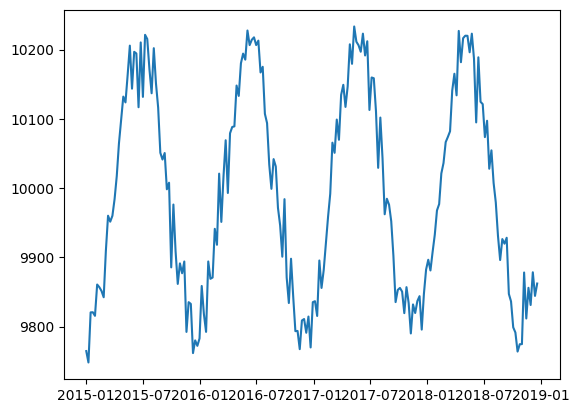

In [3]:
plt.plot(data)

(array([19., 27., 25., 19., 17., 15., 16., 22., 17., 31.]),
 array([ 9748.29116698,  9796.79536559,  9845.2995642 ,  9893.80376281,
         9942.30796142,  9990.81216003, 10039.31635864, 10087.82055725,
        10136.32475586, 10184.82895447, 10233.33315309]),
 <BarContainer object of 10 artists>)

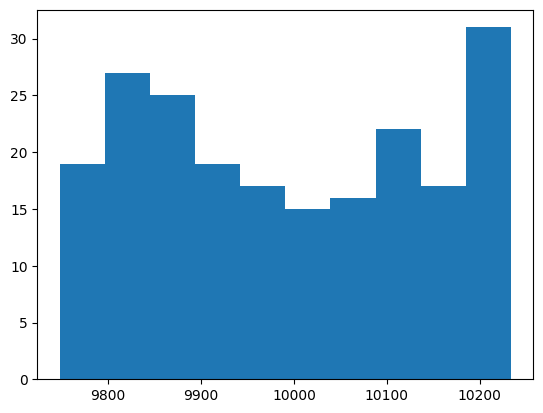

In [4]:
plt.hist(data)

In [5]:
data.describe()

count      208.000000
mean      9992.390199
std        147.537060
min       9748.291167
25%       9855.904949
50%       9981.684071
75%      10131.807525
max      10233.333153
Name: demandas, dtype: float64

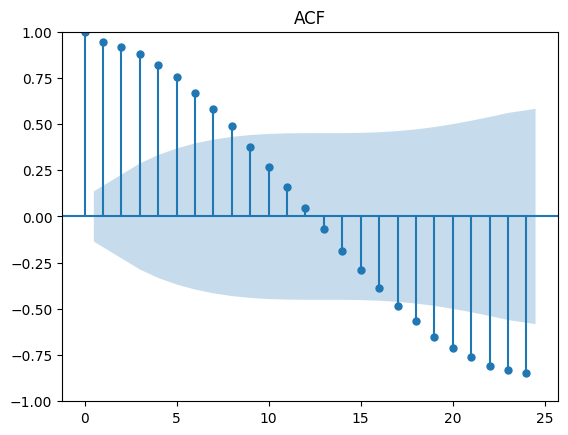

In [6]:
plot_acf(data,title='ACF')
plt.show()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


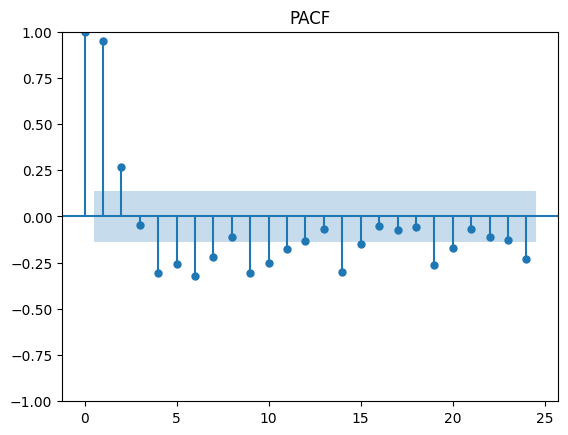

In [7]:
plot_pacf(data,title='PACF')
plt.show()

In [8]:
decom = seasonal_decompose(data)

<AxesSubplot: xlabel='date'>

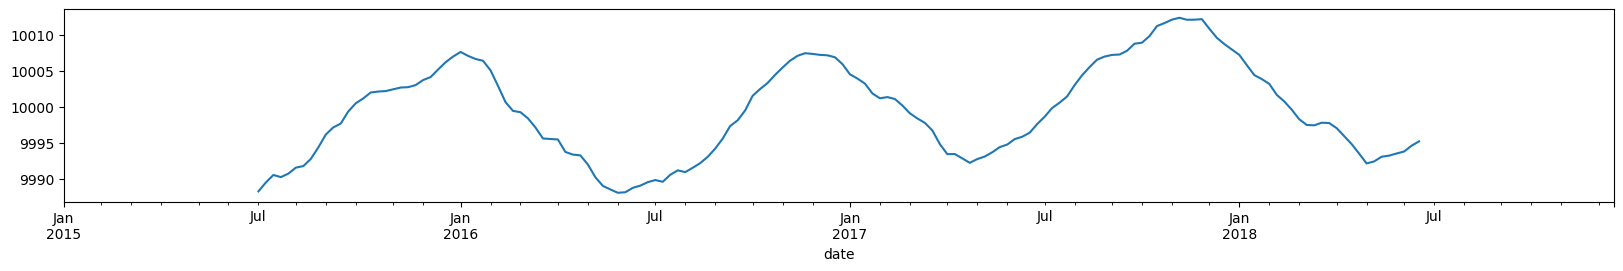

In [9]:
decom.trend.plot(figsize=(20,2.5))

In [49]:
decom.trend
pontos_mudanca = []
for i in range(len(decom.trend)):
    if not np.isnan(decom.trend[i]):
        pontos_mudanca.append(f'{decom.trend.index[i].year}/{decom.trend.index[i].month}/{decom.trend.index[i].day}')

In [52]:
'''
with open("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/trend.txt", "w") as arquivo:
	for i in pontos_mudanca:
	    arquivo.write(i+'\n')
'''

<AxesSubplot: xlabel='date'>

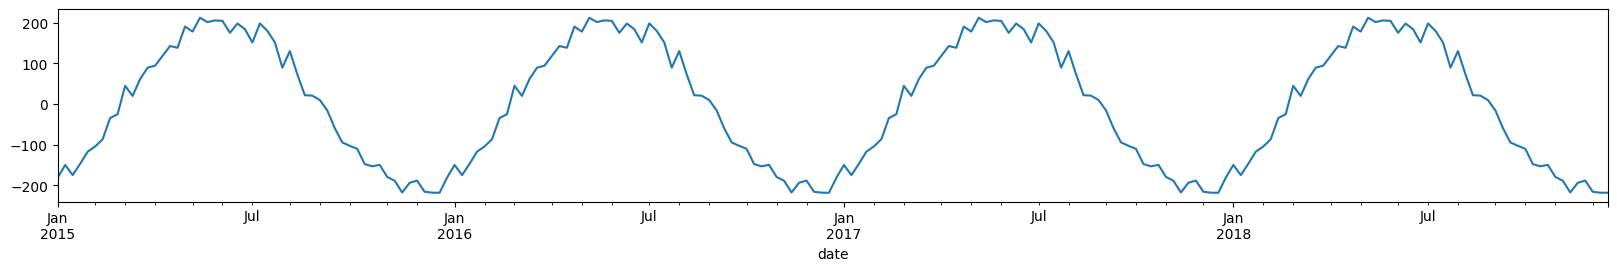

In [10]:
decom.seasonal.plot(figsize=(20,2.5))

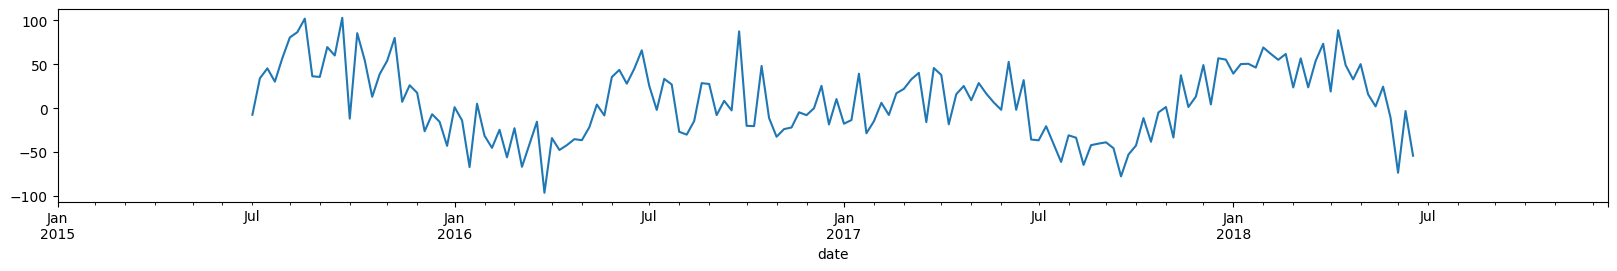

In [11]:
decom.resid.plot(figsize=(20,2.5));

<AxesSubplot: xlabel='date'>

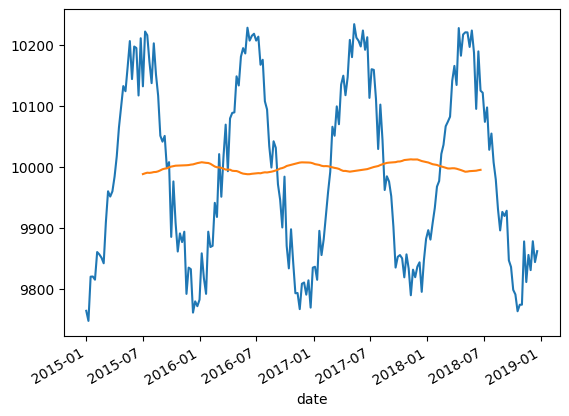

In [12]:
plt.plot(data)
decom.trend.plot()

In [13]:
media_movel = data.rolling(4).mean()

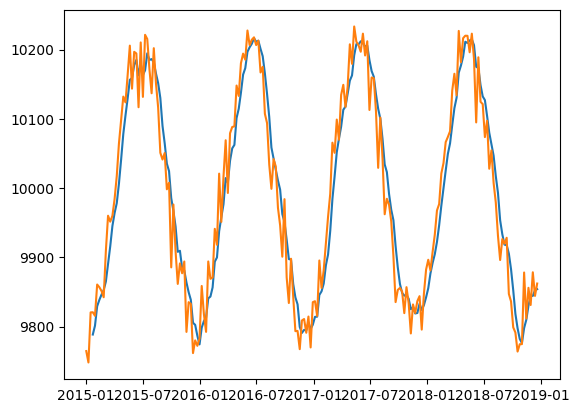

In [14]:
plt.plot(media_movel)
plt.plot(data)

<AxesSubplot: xlabel='date'>

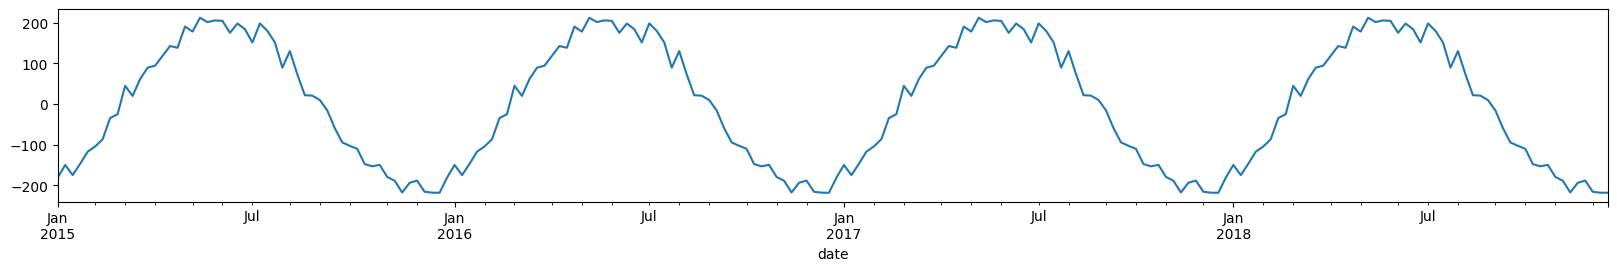

In [16]:
decom.seasonal.plot(figsize=(20,2.5))

<AxesSubplot: xlabel='date'>

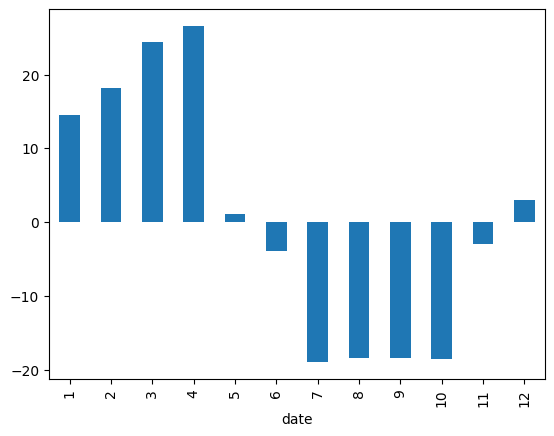

In [17]:
data.diff().groupby(data.index.month).mean().plot(kind='bar')